In [3]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import json

# 定義要爬取的網站URL
url = "https://mindy05tw.pixnet.net/blog/post/68078577"

# 發送HTTP請求，獲取網頁內容
response = requests.get(url)

# 使用BeautifulSoup解析HTML內容
soup = BeautifulSoup(response.content, "html.parser")

# 手動指定標題和日期
title = "柯爾柏格道德發展的三期六段論"
date = "Jun 13 2019 03:45"

# 提取內容
content = ""
content_tag = soup.find("div", class_="article-content-inner")
if content_tag:
    for paragraph in content_tag.find_all("p"):
        content += paragraph.text.strip() + "\n"
else:
    content = "Content Not Found"

# 印出提取的資料
print("標題:", title)
print("日期:", date)
print("內容:\n", content)


標題: 柯爾柏格道德發展的三期六段論
日期: Jun 13 2019 03:45
內容:
 柯爾柏格道德發展的三期六段論
一、道德成規前期：學前幼稚園至小學中低年級(九歲以下)
(一)避罰服從取向：恐懼懲罰，無條件服從權威者，個體認為凡是不被懲罰的行為都是好的；遭到批評、指責的行為都是壞的。
(二)相對功利取向：行為對錯視行為後果賞罰而定，道德是一種利益交換，希望得到比付出多，類似買賣的關係，認為得到利益就是好的。
二、道德循規期：小學高年級到青春期(九到十二歲)
(三)尋求認可取向：以人際關係和諧導向，順從傳統要求，表現從眾行為。
(四)順從權威取向：以法治觀念判斷是非，信守法律權威，重視社會秩序。
三、道德自律期：青年末期接近人格成熟時開始(十二歲以上)
(五)法治觀念取向：表現思考的靈活性，不用單一的規則去評價個體行為，法律為公益而制定，行為對錯視雙方契約或大眾的共同認可而定。
(六)普遍倫理取向：個人根據他人的人生觀和價值觀，以建立道德判斷、一致和普遍性的信念，信念的基礎是人性尊嚴、真理、正義和人權。



In [9]:
import pandas as pd

# 創建 DataFrame
df = pd.DataFrame({
    "標題": [title],
    "日期": [date],
    "內容": [content]
})

# 印出 DataFrame
print(df)


               標題                 日期  \
0  柯爾柏格道德發展的三期六段論  Jun 13 2019 03:45   

                                                  內容  
0  柯爾柏格道德發展的三期六段論\n一、道德成規前期：學前幼稚園至小學中低年級(九歲以下)\n(...  


In [10]:
from google.colab import auth
auth.authenticate_user()

import google.auth
from google.auth.transport.requests import Request
from google.colab import auth
from oauth2client.client import GoogleCredentials
from gspread import authorize

creds, _ = google.auth.default()
gc = authorize(creds)

In [5]:
def df_to_sheets(df, spreadsheet_id, sheet_name):
  try:
    sh = gc.open_by_key(spreadsheet_id)
  except Exception as e:
    print(f"Error opening the Spreadsheet: {e}")
    return

  try:
    worksheet = sh.worksheet(sheet_name)
  except gspread.WorksheetNotFound:
    worksheet = sh.add_worksheet(title=sheet_name, rows="100", cols="20")

  worksheet.update([df.columns.values.tolist()] + df.values.tolist())

In [6]:
spreadsheet_id = '1vakScYWksepjzCu9qn6g9tMr7B_ZF3mIzsbp1JUuavs'
sheet_name = 'HW004'

def truncate_to_limit(cell_value, limit=10000):
  if len(cell_value) > limit:
    return cell_value[:limit] + '... [內容過長，已停止寫入]'
  else:
    return cell_value

In [11]:
df_truncated = df.applymap(lambda x: truncate_to_limit(str(x)))
df_truncated

,標題,日期,內容
0,柯爾柏格道德發展的三期六段論,Jun 13 2019 03:45,柯爾柏格道德發展的三期六段論\n一、道德成規前期：學前幼稚園至小學中低年級(九歲以下)\n(...


In [12]:
df_to_sheets(df_truncated, spreadsheet_id, sheet_name)

In [13]:
!pip install transformers torch

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-m

In [14]:
import getpass
import os
os.environ["HUGGINGFACE_API_KEY"] = getpass.getpass()

··········


In [17]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

import pandas as pd
# read data and put it in a dataframe
# 在 google 工作表載入 gsheets
gsheets = gc.open_by_url('https://docs.google.com/spreadsheets/d/1vakScYWksepjzCu9qn6g9tMr7B_ZF3mIzsbp1JUuavs/edit?usp=sharing')
# 從 gsheets 的工作表
sheets1 = gsheets.worksheet('HW004').get_all_values()

df = pd.DataFrame(sheets1[1:], columns=sheets1[0])

In [65]:
df.head()

,標題,日期,內容,keywords
0,柯爾柏格道德發展的三期六段論,Jun 13 2019 03:45,柯爾柏格道德發展的三期六段論\n一、道德成規前期：學前幼稚園至小學中低年級(九歲以下)\n(...,"[懲罰, 行為, 道德, 六段, 柯爾柏格, 發展, 論一, 成規, 學前, 園至]"


In [66]:
text = df['內容'][0]
text

'柯爾柏格道德發展的三期六段論\n一、道德成規前期：學前幼稚園至小學中低年級(九歲以下)\n(一)避罰服從取向：恐懼懲罰，無條件服從權威者，個體認為凡是不被懲罰的行為都是好的；遭到批評、指責的行為都是壞的。\n(二)相對功利取向：行為對錯視行為後果賞罰而定，道德是一種利益交換，希望得到比付出多，類似買賣的關係，認為得到利益就是好的。\n二、道德循規期：小學高年級到青春期(九到十二歲)\n(三)尋求認可取向：以人際關係和諧導向，順從傳統要求，表現從眾行為。\n(四)順從權威取向：以法治觀念判斷是非，信守法律權威，重視社會秩序。\n三、道德自律期：青年末期接近人格成熟時開始(十二歲以上)\n(五)法治觀念取向：表現思考的靈活性，不用單一的規則去評價個體行為，法律為公益而制定，行為對錯視雙方契約或大眾的共同認可而定。\n(六)普遍倫理取向：個人根據他人的人生觀和價值觀，以建立道德判斷、一致和普遍性的信念，信念的基礎是人性尊嚴、真理、正義和人權。\n'

In [67]:
from transformers import AutoModelForCausalLM, AutoTokenizer

def Mistral_summarize(text):

  device = "cuda" # the device to load the model onto

  model = AutoModelForCausalLM.from_pretrained("MediaTek-Research/Breeze-7B-Instruct-v1_0")
  tokenizer = AutoTokenizer.from_pretrained("MediaTek-Research/Breeze-7B-Instruct-v1_0")

  messages = [
      {"role": "user", "content": "What is your favourite condiment?"},
      {"role": "assistant", "content": "Well, I'm quite partial to a good squeeze of fresh lemon juice. It adds just the right amount of zesty flavour to whatever I'm cooking up in the kitchen!"},
      {"role": "user", "content": {text}}
  ]

  encodeds = tokenizer.apply_chat_template(messages, return_tensors="pt")

  model_inputs = encodeds.to(device)

  generated_ids = model.generate(model_inputs, max_new_tokens=1000, do_sample=True)
  decoded = tokenizer.batch_decode(generated_ids)

  return decoded

In [68]:
from transformers import BertTokenizer, BertModel, BertForMaskedLM
import torch

def bart_summarize(text):



    tokenizer = BertTokenizer.from_pretrained('hfl/chinese-bert-wwm')
    model = BertForMaskedLM.from_pretrained('hfl/chinese-bert-wwm')

    inputs = tokenizer(text, return_tensors="pt", max_length=100, truncation=True)
    summary_ids = model.generate(inputs['input_ids'], max_length=128)

    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return summary

In [69]:
summary = bart_summarize(text)
print(summary)

Some weights of the model checkpoint at hfl/chinese-bert-wwm were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


柯 爾 柏 格 道 德 發 展 的 三 期 六 段 論 一 、 道 德 成 規 前 期 ： 學 前 幼 稚 園 至 小 學 中 低 年 級 ( 九 歲 以 下 ) ( 一 ) 避 罰 服 從 取 向 ： 恐 懼 懲 罰 ， 無 條 件 服 從 權 威 者 ， 個 體 認 為 凡 是 不 被 懲 罰 的 行 為 都 是 好 的 ； 遭 到 批 評 、 指 責 的 行 為 都 是 壞 的 。 二 、 懲 罰 ： 對 人 的 懲 罰 是 人 的 罪 。 三 、 罪 ： 罪 ： 罪 ： 罪 ： 罪 ： 罪


In [70]:
def remove_spaces(text):
    # 使用 replace 方法來刪除空格
    return text.replace(" ", "")

output_text = remove_spaces(summary)
output_text

'柯爾柏格道德發展的三期六段論一、道德成規前期：學前幼稚園至小學中低年級(九歲以下)(一)避罰服從取向：恐懼懲罰，無條件服從權威者，個體認為凡是不被懲罰的行為都是好的；遭到批評、指責的行為都是壞的。二、懲罰：對人的懲罰是人的罪。三、罪：罪：罪：罪：罪：罪'

In [71]:
import jieba
import jieba.analyse

jieba.analyse.extract_tags(output_text, topK=10)

['懲罰', '行為', '道德', '六段', '柯爾柏格', '發展', '論一', '成規', '學前', '園至']

In [72]:
# 使用 jieba 提取關鍵字
def extract_keywords(text):
    #text = keep_chinese_chars(text)

    summary = bart_summarize(text)
    outputt_ext = remove_spaces(summary)

    return jieba.analyse.extract_tags(outputt_ext, topK=10)  # 提取前十個關鍵字

df['keywords'] = df['內容'].apply(extract_keywords)

Some weights of the model checkpoint at hfl/chinese-bert-wwm were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [73]:
df.head()

,標題,日期,內容,keywords
0,柯爾柏格道德發展的三期六段論,Jun 13 2019 03:45,柯爾柏格道德發展的三期六段論\n一、道德成規前期：學前幼稚園至小學中低年級(九歲以下)\n(...,"[懲罰, 行為, 道德, 六段, 柯爾柏格, 發展, 論一, 成規, 學前, 園至]"


In [74]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from community import community_louvain

In [75]:
G = nx.Graph()

for index, row in df.iterrows():
    title = row['標題']
    keywords = row['keywords']

    G.add_node(title, type='標題')

    for keyword in keywords:
        G.add_node(keyword, type='keyword')
        G.add_edge(title, keyword)

In [76]:
keywords

['懲罰', '行為', '道德', '六段', '柯爾柏格', '發展', '論一', '成規', '學前', '園至']

In [77]:
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
import matplotlib as mpl
from matplotlib.font_manager import fontManager
# 改style要在改font之前
# plt.style.use('seaborn')
fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

--2024-04-30 11:48:44--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 74.125.203.113, 74.125.203.100, 74.125.203.138, ...
Connecting to drive.google.com (drive.google.com)|74.125.203.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2024-04-30 11:48:45--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 64.233.187.132, 2404:6800:4008:c05::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|64.233.187.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M  --.-KB/s    in 0.1s    

2024-04-30 11:48:

/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:450: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


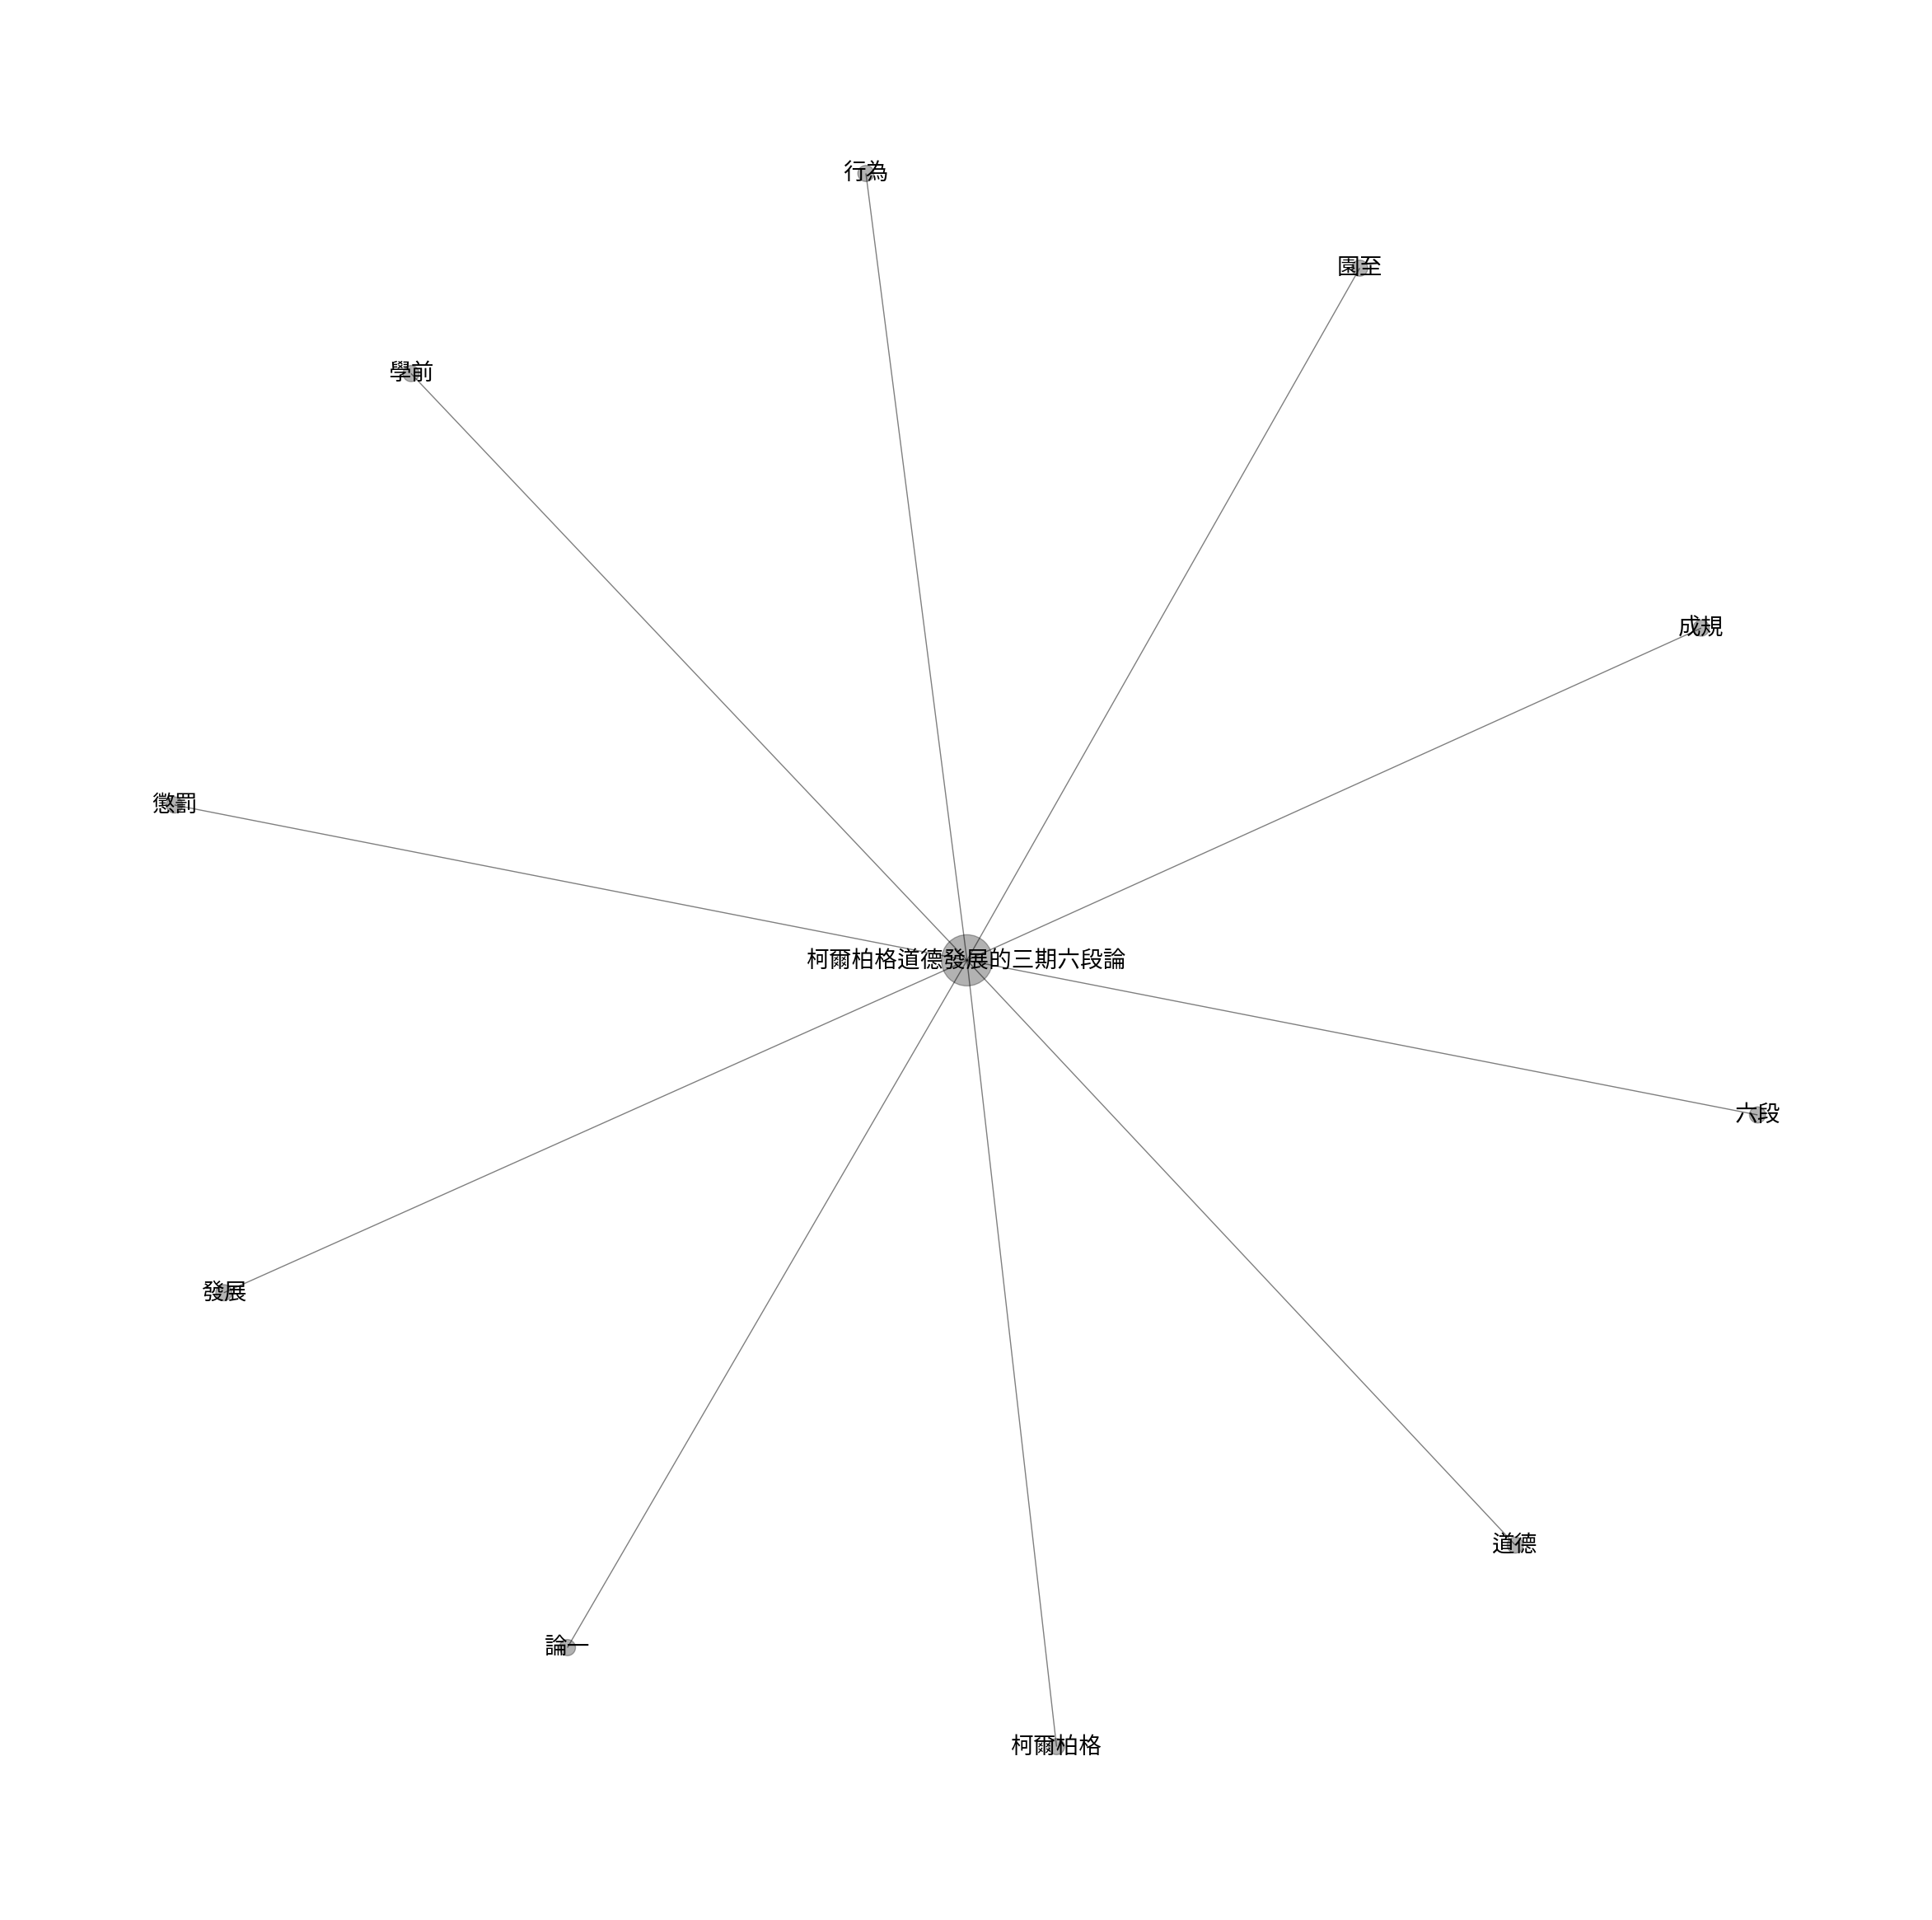

In [78]:
partition = community_louvain.best_partition(G)

community_colors = [partition[node] for node in G.nodes()]

cmap = plt.cm.jet
max_community_color = max(community_colors)
colors_with_alpha = [cmap(community_color / max_community_color) if max_community_color != 0 else (0, 0, 0, 0.3) for community_color in community_colors]


colors_with_alpha = [(r, g, b, 0.3) for r, g, b, _ in colors_with_alpha]

node_sizes = [200 * G.degree(node) for node in G.nodes()]

pos = nx.spring_layout(G, k=0.2, iterations=80)

plt.figure(figsize=(30, 30))
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_nodes(G, pos, node_color=colors_with_alpha, node_size=node_sizes, cmap=plt.cm.jet)
nx.draw_networkx_labels(G, pos, font_size=20, font_family='Taipei Sans TC Beta')

plt.axis('off')
plt.show()